In [1]:
#PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df=pd.read_csv("df.csv")

In [4]:
df.head()

,Revente >1,libnatmut,valeurfonc,nblot,l_codinsee,nblocdep,Type appart,scarrez,anarnc202012_nb_log,anarnc202012_nb_lot_garpark,...,baie_orientation_autre,Commerces_bruyants,qty_of_mut,datemut,anneemut,moismut,etaban_lot,cat_valeur,surface_appart,cat_scarrez
0,0,Vente,370000.0,1,75101,1,2P,26.06,158.0,0.0,...,0,1,1,2021-06-04,2021,6,75101_4901_00019_93,Entre 320 & 436k€ €,32,<35 m²
1,0,Vente,451000.0,1,75117,0,2P,35.53,32.0,0.0,...,0,0,1,2021-03-18,2021,3,75117_5503_00103_24,Entre 436 & 600k€,30,Entre 35 & 47 m²
2,0,Vente,433000.0,3,75115,1,3P,35.40,50.0,0.0,...,0,0,1,2021-11-12,2021,11,75115_2521_00008_19,Entre 320 & 436k€ €,34,Entre 35 & 47 m²
3,1,Vente,561076.0,1,75118,0,2P,46.02,29.0,0.0,...,0,1,2,2021-01-08,2021,1,75118_2113_00110_19,Entre 436 & 600k€,50,Entre 35 & 47 m²
4,1,Vente,375980.0,1,75118,0,2P,45.76,29.0,0.0,...,0,1,2,2016-09-09,2016,9,75118_2113_00110_19,Entre 320 & 436k€ €,50,Entre 35 & 47 m²


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102577 entries, 0 to 102576
Data columns (total 41 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Revente >1                                   102577 non-null  int64  
 1   libnatmut                                    102577 non-null  object 
 2   valeurfonc                                   102577 non-null  float64
 3   nblot                                        102577 non-null  object 
 4   l_codinsee                                   102577 non-null  int64  
 5   nblocdep                                     102577 non-null  int64  
 6   Type appart                                  102577 non-null  object 
 7   scarrez                                      102577 non-null  float64
 8   anarnc202012_nb_log                          102577 non-null  float64
 9   anarnc202012_nb_lot_garpark                  102577 non-nul

In [6]:
#suppression des variables qui vont gêner la modélisation :

to_drop=(["datemut",
         "moismut",
         "etaban_lot",
         "cat_valeur",
         "cat_scarrez"])
df=df.drop(to_drop, axis=1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102577 entries, 0 to 102576
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Revente >1                                   102577 non-null  int64  
 1   libnatmut                                    102577 non-null  object 
 2   valeurfonc                                   102577 non-null  float64
 3   nblot                                        102577 non-null  object 
 4   l_codinsee                                   102577 non-null  int64  
 5   nblocdep                                     102577 non-null  int64  
 6   Type appart                                  102577 non-null  object 
 7   scarrez                                      102577 non-null  float64
 8   anarnc202012_nb_log                          102577 non-null  float64
 9   anarnc202012_nb_lot_garpark                  102577 non-nul

In [8]:
df.isna().sum()

Revente >1                                     0
libnatmut                                      0
valeurfonc                                     0
nblot                                          0
l_codinsee                                     0
nblocdep                                       0
Type appart                                    0
scarrez                                        0
anarnc202012_nb_log                            0
anarnc202012_nb_lot_garpark                    0
anarnc202012_nb_lot_tertiaire                  0
anarnc202012_nb_lot_tot                        0
adedpe202006_logtype_baie_type_vitrage         0
adedpe202006_logtype_ch_gen_lib_princ          0
adedpe202006_logtype_classe_conso_ener         0
adedpe202006_logtype_classe_estim_ges          0
adedpe202006_logtype_traversant                0
adedpe202006_logtype_ecs_type_ener             0
adedpe202006_logtype_ph_pos_isol               0
adedpe202006_logtype_presence_climatisation    0
adedpe202006_logtype

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# On va garder "Revente >1" comme variable cible. Suppression de "qty_of_mut"
df=df.drop("qty_of_mut", axis=1)

In [11]:
#Features / Target

X=df.drop("Revente >1", axis=1)
y=df["Revente >1"]

X.shape, y.shape

((102577, 34), (102577,))

In [12]:
numeric_columns=X.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['valeurfonc',
 'l_codinsee',
 'nblocdep',
 'scarrez',
 'anarnc202012_nb_log',
 'anarnc202012_nb_lot_garpark',
 'anarnc202012_nb_lot_tertiaire',
 'anarnc202012_nb_lot_tot',
 'adedpe202006_logtype_presence_climatisation',
 'ancqpv201410_is_qpv',
 'cerffo2020_nb_log',
 'igntop202103_bat_hauteur',
 'mcumer202007_is_mer',
 'baie_orientation_sud',
 'baie_orientation_nord',
 'baie_orientation_ouest',
 'baie_orientation_est',
 'baie_orientation_autre',
 'Commerces_bruyants',
 'anneemut',
 'surface_appart']

In [13]:
object_columns=X.select_dtypes(include='object').columns.tolist()
object_columns

['libnatmut',
 'nblot',
 'Type appart',
 'adedpe202006_logtype_baie_type_vitrage',
 'adedpe202006_logtype_ch_gen_lib_princ',
 'adedpe202006_logtype_classe_conso_ener',
 'adedpe202006_logtype_classe_estim_ges',
 'adedpe202006_logtype_traversant',
 'adedpe202006_logtype_ecs_type_ener',
 'adedpe202006_logtype_ph_pos_isol',
 'adedpe202006_logtype_type_batiment',
 'cerffo2020_annee_construction',
 'cerffo2020_usage_niveau_1_txt']

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=10)
X_train.shape, X_test.shape

((76932, 34), (25645, 34))

In [15]:
#DICHOTOMISATION

In [16]:
X_train=pd.get_dummies(X_train)

In [17]:
X_test=pd.get_dummies(X_test)

In [18]:
X_train.shape

(76932, 111)

In [19]:
X_test.shape

(25645, 111)

In [20]:
# NORMALISATION

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [21]:
# PCA = L'analyse en composantes principales (PCA pour Principal Component Analysis) est une méthode de réduction 
# de dimension qui consiste à transformer des variables corrélées en nouvelles variables décorrélées les unes des autres.
# Il s’agit de résumer l’information contenue dans un ensemble de données en un certain nombre de variables synthétiques, 
# combinaisons linéaires des variables originelles : ce sont les Composantes Principales.
# L’enjeu est généralement de réduire de manière significative la dimension du jeu de données tout en conservant 
# au maximum l'information véhiculée par les données. 

from sklearn.decomposition import PCA

In [22]:
pca=PCA()

In [23]:
pca.fit(X_train)

PCA()

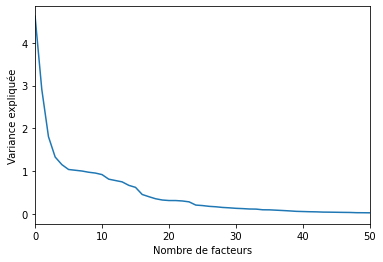

In [24]:
plt.figure()
plt.xlim(0,50)
plt.plot(pca.explained_variance_)
plt.xlabel('Nombre de facteurs')
plt.ylabel('Variance expliquée');

In [25]:
#Sur ce graphique on voit la variance expliquée en fonction de nombre de composantes de l'ACP: on voit que les premiers facteurs
#ont la variance expliquée la plus elevée, donc ils concentrent l'essentiel d'information.

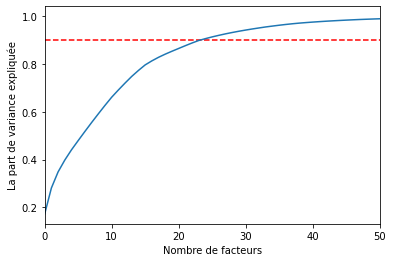

In [26]:
plt.figure()
plt.xlim(0,50)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Nombre de facteurs')
plt.ylabel('La part de variance expliquée');

In [27]:
#Ce graphique represente la part de la variance expliquée en fonction de nombres de facteurs l'ACP: on voit que les premiers
#25 facteurs expliquent 90% de totalité d'information. Donc on va garder que ces 25 facteurs.

In [28]:
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)

In [29]:
X_test_pca = pca.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier

model7=DecisionTreeClassifier()
model7.fit(X_train_pca, y_train)
model7.score(X_test_pca, y_test)

0.7054786508091246

In [31]:
y_pred_7=model7.predict(X_test_pca)
pd.crosstab(y_test, y_pred_7)


col_0,0,1
Revente >1,,
0,16748,4075
1,3478,1344


In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     20823
           1       0.25      0.28      0.26      4822

    accuracy                           0.71     25645
   macro avg       0.54      0.54      0.54     25645
weighted avg       0.72      0.71      0.71     25645



In [34]:
# LDA : L'analyse discriminante linéaire (LDA, Linear Discriminant Analysis en anglais) 
# fonctionne sur le même principe que la PCA : la décomposition matricielle permet de projeter les données 
# sur un hyperplan de l'espace original. Cependant, là où la PCA peut s'appliquer sur toutes sortes de données, 
# la LDA nécessite des données étiquetées. L'idée derrière cet algorithme est de projeter les données de telle sorte 
# que la variance au sein d'une classe soit la plus faible possible, tout en maximisant la variance entre les classes. 
# La LDA est donc un algorithme supervisé à l'inverse de la PCA qui est un algorithme non supervisé.


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [35]:
lda = LDA()
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [36]:
X_train_lda.shape

(76932, 1)

In [37]:
from sklearn.tree import DecisionTreeClassifier

model7=DecisionTreeClassifier()

In [38]:
model7.fit(X_train_lda, y_train)

DecisionTreeClassifier()

In [39]:
model7.score(X_test_lda, y_test)

0.7033729771885358

In [40]:
y_pred_7=model7.predict(X_test_lda)
pd.crosstab(y_test, y_pred_7)

col_0,0,1
Revente >1,,
0,17079,3744
1,3863,959


In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     20823
           1       0.20      0.20      0.20      4822

    accuracy                           0.70     25645
   macro avg       0.51      0.51      0.51     25645
weighted avg       0.70      0.70      0.70     25645



In [43]:
# TSNE : L'objectif de T-SNE est similaire à celui de l'ACP : représenter nos données dans une dimension plus petite.
# Cependant, le principe de T-SNE est différent : Il construit une nouvelle représentation des données de manière 
# à ce que les données proches dans la dimension d'origine aient une forte probabilité d'avoir 
# des représentations proches dans la nouvelle dimension.
# En clair, T-SNE calcule une mesure de similarité entre chaque paire d'individus dans l'espace de grande dimension et dans l'espace de faible dimension. Il tente ensuite d'optimiser ces deux mesures à l'aide d'une fonction de coût.

#from sklearn.manifold import TSNE

# => a pris trop de temps

In [44]:
#tsne=TSNE(n_components=2, random_state=0)

In [45]:
#tsne.fit(X_train, y_train)
#X_train_tsne = tsne.transform(X_train)
#X_test_tsne = tsne.transform(X_test)

In [46]:
#X_train_tsne.shape

In [47]:
#from sklearn.tree import DecisionTreeClassifier

#model7=DecisionTreeClassifier()
#model7.fit(X_train_tsne, y_train)
#model7.score(X_test_tsne, y_test)

In [48]:
# Synthèse des scores dasn le doc Excel Compar_scores